In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
np.random.seed(42)
n_samples = 1000

In [4]:
data = {
    'square_feet': np.random.randint(800, 4000, n_samples),
    'bedrooms': np.random.randint(1, 6, n_samples),
    'bathrooms': np.random.randint(1, 4, n_samples),
    'age_years': np.random.randint(0, 50, n_samples),
    'garage_spaces': np.random.randint(0, 3, n_samples),
    'lot_size': np.random.randint(2000, 15000, n_samples),
    'distance_to_city': np.random.uniform(1, 30, n_samples)  # miles
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,square_feet,bedrooms,bathrooms,age_years,garage_spaces,lot_size,distance_to_city
0,3974,1,2,11,1,4378,15.633952
1,1660,5,2,1,0,3205,4.401124
2,2094,4,1,6,1,6988,5.902792
3,1930,2,2,15,0,14031,11.202345
4,1895,1,1,2,1,7669,23.088600
...,...,...,...,...,...,...,...
995,3653,4,3,40,2,13228,23.964848
996,3586,5,2,16,0,13563,24.535588
997,2706,2,2,25,1,7929,14.985946
998,3886,3,2,43,1,8792,2.661999


In [7]:
df['price'] = (
    150 * df['square_feet'] + 
    20000 * df['bedrooms'] + 
    15000 * df['bathrooms'] - 
    2000 * df['age_years'] + 
    10000 * df['garage_spaces'] + 
    5 * df['lot_size'] - 
    3000 * df['distance_to_city'] +
    np.random.normal(0, 30000, n_samples)  # Add noise
)

In [14]:
print('=' * 50)
print('Dataset Info: ')
print('=' * 50)
print(df.head())
print(f'\nShape: {df.shape}')
print(f'\nStatistics:\n{df.describe()}')
print(f'\nMissing values:\n {df.isnull().sum()}')

Dataset Info: 
   square_feet  bedrooms  bathrooms  age_years  garage_spaces  lot_size  \
0         3974         1          2         11              1      4378   
1         1660         5          2          1              0      3205   
2         2094         4          1          6              1      6988   
3         1930         2          2         15              0     14031   
4         1895         1          1          2              1      7669   

   distance_to_city          price  
0         15.633952  640080.394397  
1          4.401124  410177.039651  
2          5.902792  429868.555852  
3         11.202345  392723.116148  
4         23.088600  269299.806548  

Shape: (1000, 8)

Statistics:
       square_feet     bedrooms    bathrooms    age_years  garage_spaces  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean   2429.857000     2.993000     1.966000    24.817000       0.980000   
std     929.914229     1.424423     0.803424    14.25

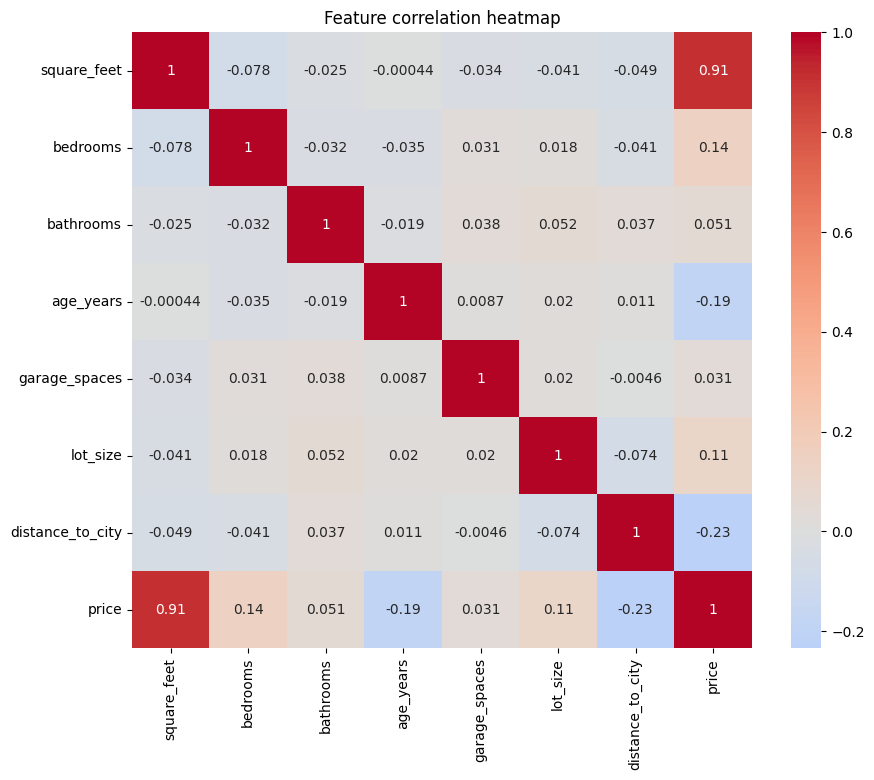

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature correlation heatmap')
plt.show()

In [16]:
X = df.drop('price', axis=1)
Y = df['price']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [22]:
print('\n' + '=' * 50)
print('Data split')
print('=' * 50)
print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')


Data split
Training samples: 800
Testing samples: 200


In [27]:
print("\n" + "=" * 50)
print("TRAINING MODELS")
print("=" * 50)

models = {
    'Linear Reg': LinearRegression(),
    'Ridge Reg': Ridge(alpha=1.0),
    'Lasso Reg': Lasso(alpha=1.0),
    'Decisional Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f'\ntraining {name}...')
    
    if name in ['Linear Reg', 'Ridge Reg', 'Lasso Reg']:
        model.fit(X_train_scaled, Y_train)
        Y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    results[name] = {
        'model': model,
        'predictions': Y_pred,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  R² Score: {r2:.4f}")


TRAINING MODELS

training Linear Reg...
  RMSE: $37,009.35
  MAE: $29,367.67
  R² Score: 0.9318

training Ridge Reg...
  RMSE: $36,956.75
  MAE: $29,325.34
  R² Score: 0.9320

training Lasso Reg...
  RMSE: $37,008.93
  MAE: $29,367.31
  R² Score: 0.9318

training Decisional Tree...
  RMSE: $56,793.51
  MAE: $46,220.11
  R² Score: 0.8395

training Random Forest...
  RMSE: $40,423.31
  MAE: $32,830.77
  R² Score: 0.9187

training Gradient Boosting...
  RMSE: $34,881.31
  MAE: $28,719.26
  R² Score: 0.9395


In [28]:
print("\n" + "=" * 50)
print("MODEL COMPARISON")
print("=" * 50)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[m]['RMSE'] for m in results],
    'MAE': [results[m]['MAE'] for m in results],
    'R²': [results[m]['R2'] for m in results]
})
comparison_df = comparison_df.sort_values('RMSE')
print(comparison_df.to_string(index=False))


MODEL COMPARISON
            Model         RMSE          MAE       R²
Gradient Boosting 34881.309526 28719.258386 0.939458
        Ridge Reg 36956.749408 29325.342206 0.932039
        Lasso Reg 37008.927062 29367.310205 0.931847
       Linear Reg 37009.347684 29367.671513 0.931845
    Random Forest 40423.311386 32830.774755 0.918691
  Decisional Tree 56793.511137 46220.111206 0.839501


In [29]:
best_model_name = comparison_df.iloc[0]['Model']
best_predictions = results[best_model_name]['predictions']

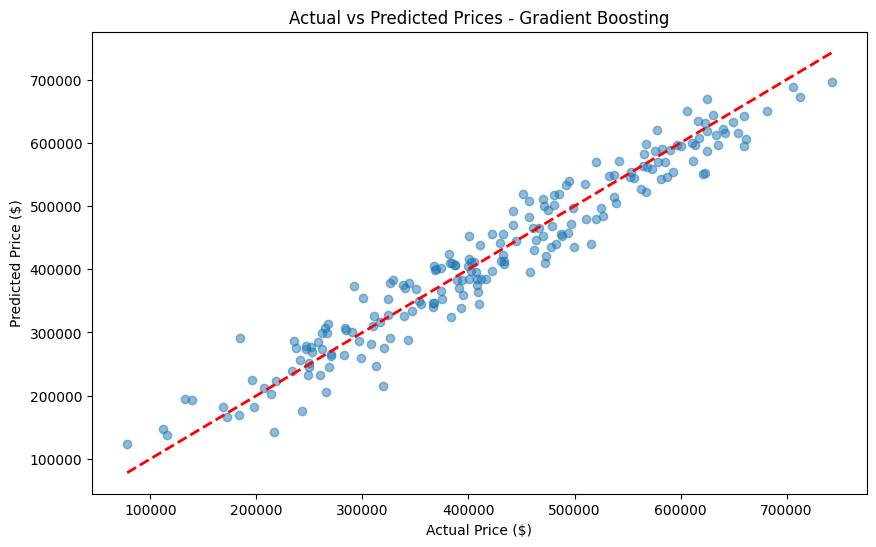

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, best_predictions, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.show()